In [10]:
%pylab inline
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [7]:
data = mnist.data
target = mnist.target

data.shape, target.shape

((70000, 784), (70000,))

In [8]:
X = data[::50]
y = target[::50]

# check
X.shape, y.shape

((1400, 784), (1400,))

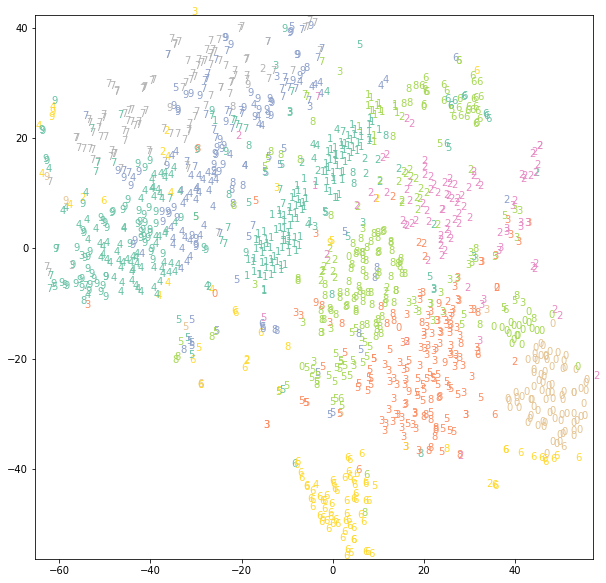

Silhouette Coefficient: 0.060
Adjusted Rand Index: 0.391


In [11]:
# 1. Choisissons le clustering avec kmeans 
from sklearn import cluster
myclust = cluster.KMeans(n_clusters=10)
myclust.fit(X)

# 2. Visualisation
# On commence par réduire la dimension des données avec tSNE. On scale d’abord les données :
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Puis on applique tSNE aux données scalées :
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca')
X_trans = tsne.fit_transform(X_scaled)

# Puis on visualise, selon la méthode donnée dans le coup de pouce :
from matplotlib import pyplot as plt # Dans Jupyter : % pylab inline
plt.figure(figsize=(10,10))
for i in range(X.shape[0]): # pour chaque point
    plt.text(X_trans[i, 0], X_trans[i, 1], str('%s' % y[i]),
            color=plt.cm.Set2(myclust.labels_[i]/10.))

# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(X_trans[:, 0]), np.max(X_trans[:, 0])])
plt.ylim([np.min(X_trans[:, 1]), np.max(X_trans[:, 1])])

# On affiche l'image
plt.show()

# 3. Évaluation
# Pour l’évaluation intrinsèque, je choisis le coefficient de silhouette :
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, myclust.labels_))

# Pour la comparaison aux étiquettes, je choisis l’indice de Rand ajusté :
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, myclust.labels_))